# Exploratory Data Analysis (EDA) of Final Dataset

This notebook performs comprehensive exploratory data analysis on the final-dataset.csv, including:
- Data overview and summary statistics
- Missing value analysis
- Univariate and bivariate analysis
- Correlation analysis
- Trend analysis
- Key insights and findings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

## 1. Load and Inspect the Dataset

In [5]:
# Load the dataset
df = pd.read_csv('../../data/cleaned/final-dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("Column Names and Types:")
print(df.dtypes)
print("\n" + "="*50)
print("First Few Rows:")
df.head()

Dataset Shape: (103712, 77)

Column Names and Types:
Station Number             int64
Boarding                    bool
Line                       int64
Passengers                 int64
Year                       int64
                          ...   
Population_Male_Total    float64
Commercial               float64
Dwelling                 float64
Green                    float64
Industry                 float64
Length: 77, dtype: object

First Few Rows:


,Station Number,Boarding,Line,Passengers,Year,Month,lat,lng,Province,District,...,Population_Male_0-5,Population_Male_13-18,Population_Male_19-64,Population_Male_6-12,Population_Male_65+,Population_Male_Total,Commercial,Dwelling,Green,Industry
0,150,False,1,1503741,2008,1,37.4876,126.753664,Gyeonggi-do,Bucheon,...,26169.0,42352.0,302800.0,41748.0,21679.0,434748.0,0.0,0.0,0.0,0.0
1,150,False,1,1394346,2008,2,37.4876,126.753664,Gyeonggi-do,Bucheon,...,26175.0,42328.0,303366.0,41444.0,21843.0,435156.0,0.0,0.0,0.0,0.0
2,150,False,1,1518669,2008,3,37.4876,126.753664,Gyeonggi-do,Bucheon,...,26060.0,42549.0,303220.0,41255.0,21981.0,435065.0,0.0,0.0,0.0,0.0
3,150,False,1,1495350,2008,4,37.4876,126.753664,Gyeonggi-do,Bucheon,...,25935.0,42613.0,303688.0,41099.0,22081.0,435416.0,0.0,0.0,0.0,0.0
4,150,False,1,1565671,2008,5,37.4876,126.753664,Gyeonggi-do,Bucheon,...,25851.0,42541.0,303882.0,40964.0,22158.0,435396.0,0.0,0.0,0.0,0.0


## 2. Data Overview and Summary Statistics

In [6]:
# Display summary statistics
print("Summary Statistics for Numeric Features:")
print(df.describe().T)

Summary Statistics for Numeric Features:
                          count           mean            std        min  \
Station Number         103712.0     497.107413     201.598703    150.000   
Line                   103712.0       4.684492       2.005887      1.000   
Passengers             103712.0  520412.441926  434307.597552      0.000   
Year                   103712.0    2016.061864       4.874919   2008.000   
Month                  103712.0       6.503298       3.452753      1.000   
...                         ...            ...            ...        ...   
Population_Male_Total  103712.0  251136.306811  111308.478399  66570.000   
Commercial             103712.0       0.161147       0.386259     -4.759   
Dwelling               103712.0       0.184130       0.373952     -4.734   
Green                  103712.0       0.084899       0.327441     -5.680   
Industry               103712.0       0.056518       0.250098     -5.705   

                              25%         50% 

## 3. Handle Missing Values

Missing Values:
No missing values found!


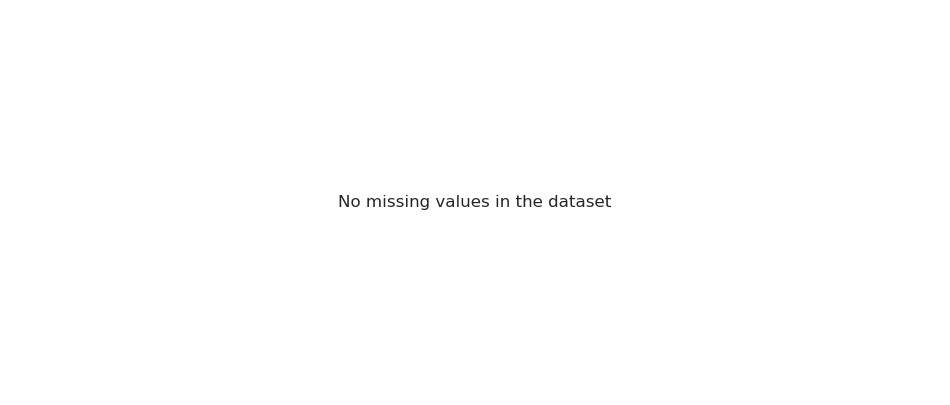

In [7]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found!")

# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 5))
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
if len(missing_percentage) > 0:
    missing_percentage.plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Percentage of Missing Values (%)')
    ax.set_title('Missing Data Visualization')
    plt.tight_layout()
else:
    ax.text(0.5, 0.5, 'No missing values in the dataset', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.axis('off')
plt.show()

## 4. Univariate Analysis

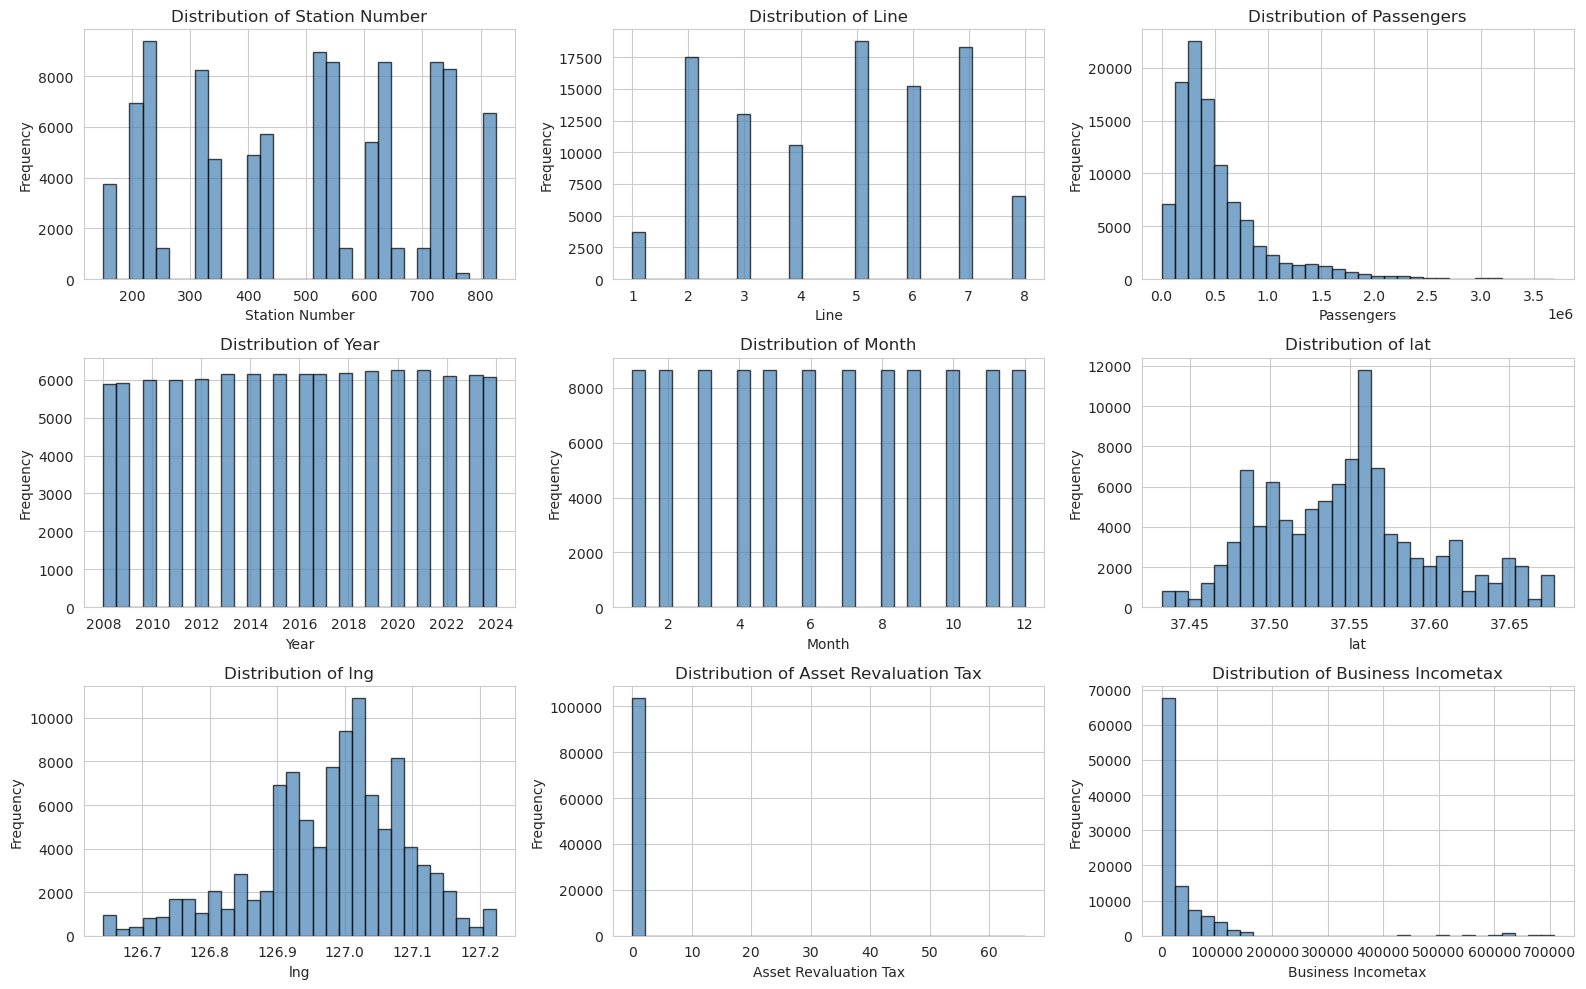

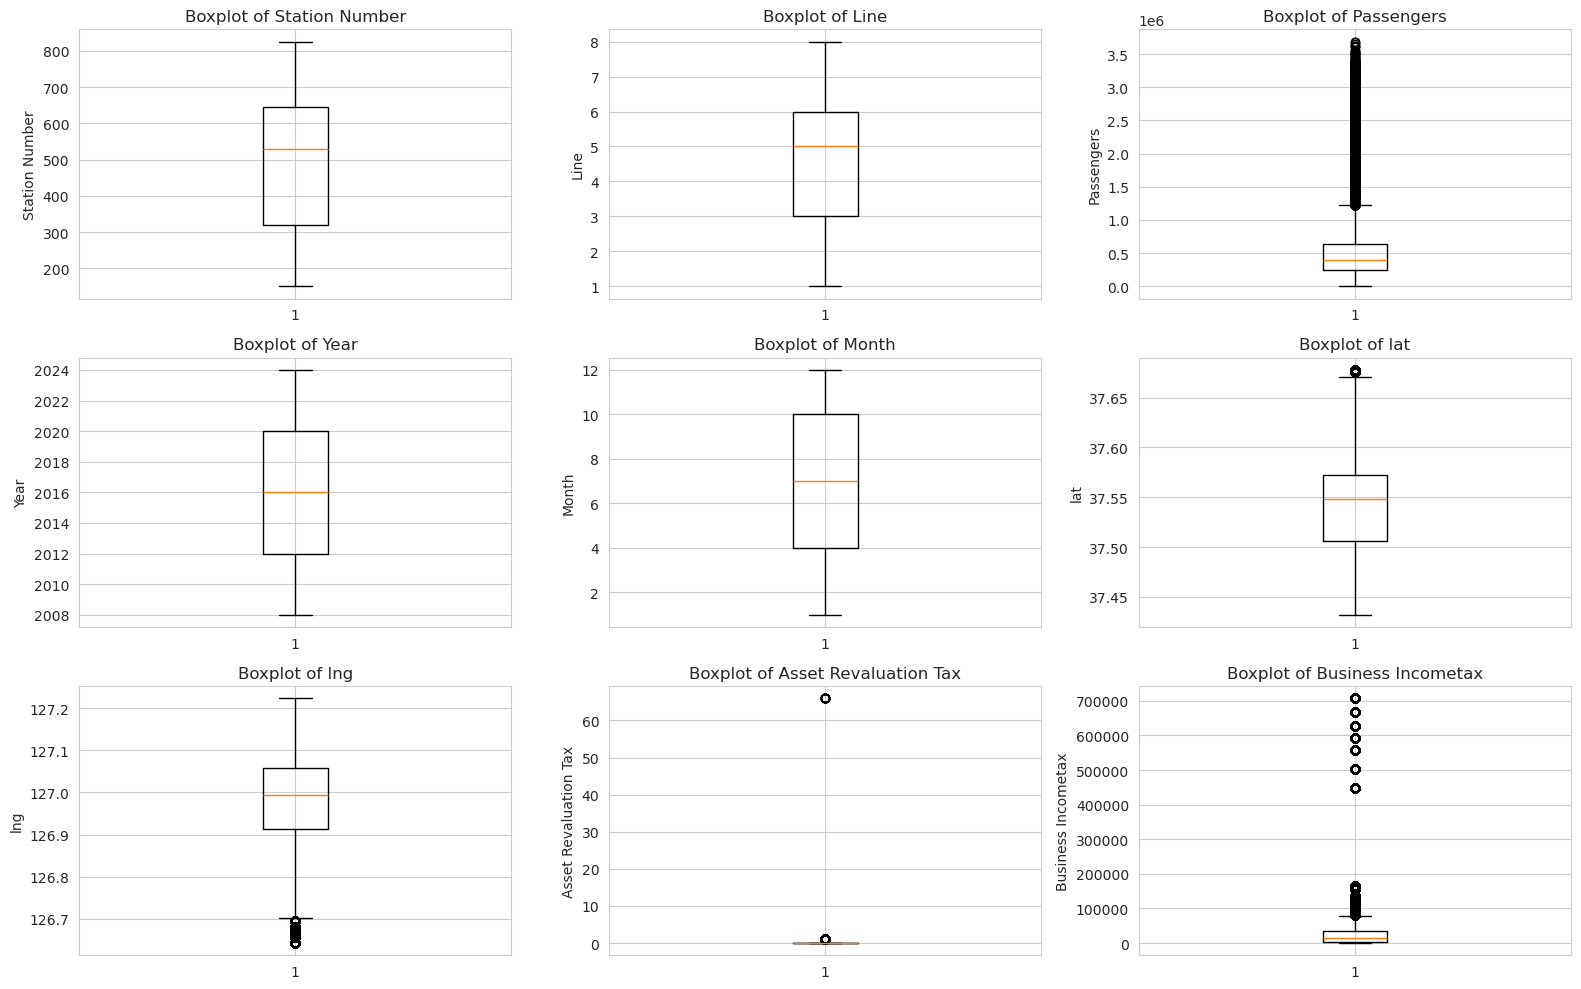

In [8]:
# Select numeric columns for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create distributions for numeric features
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 3, figure=fig)

for idx, col in enumerate(numeric_cols[:9]):
    ax = fig.add_subplot(gs[idx // 3, idx % 3])
    df[col].hist(bins=30, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display boxplots for numeric features
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 3, figure=fig)

for idx, col in enumerate(numeric_cols[:9]):
    ax = fig.add_subplot(gs[idx // 3, idx % 3])
    ax.boxplot(df[col].dropna(), vert=True)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

## 5. Bivariate Analysis

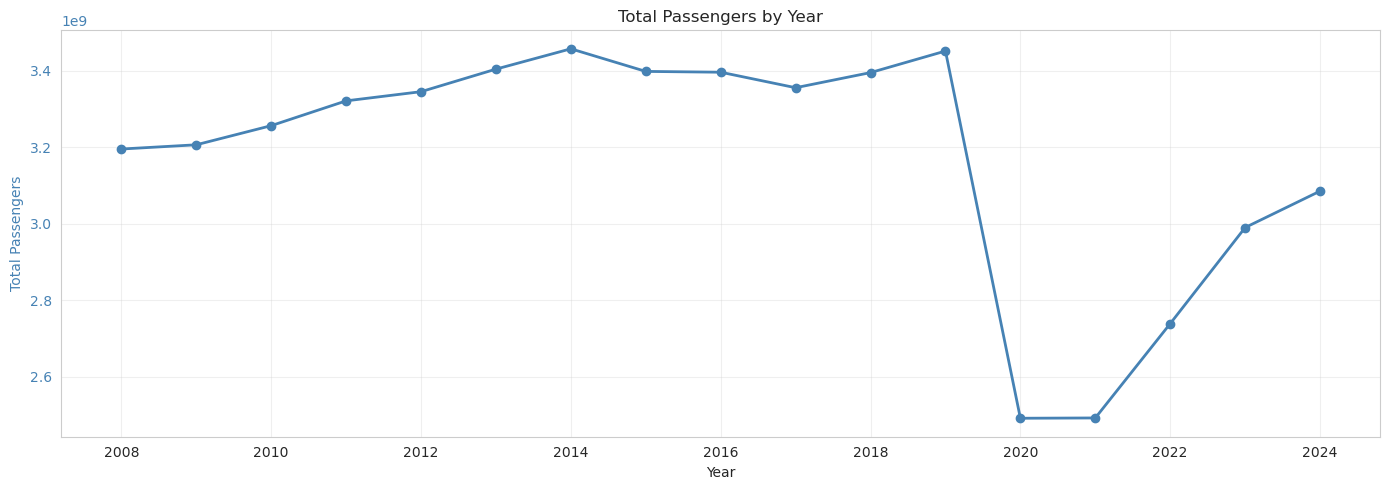

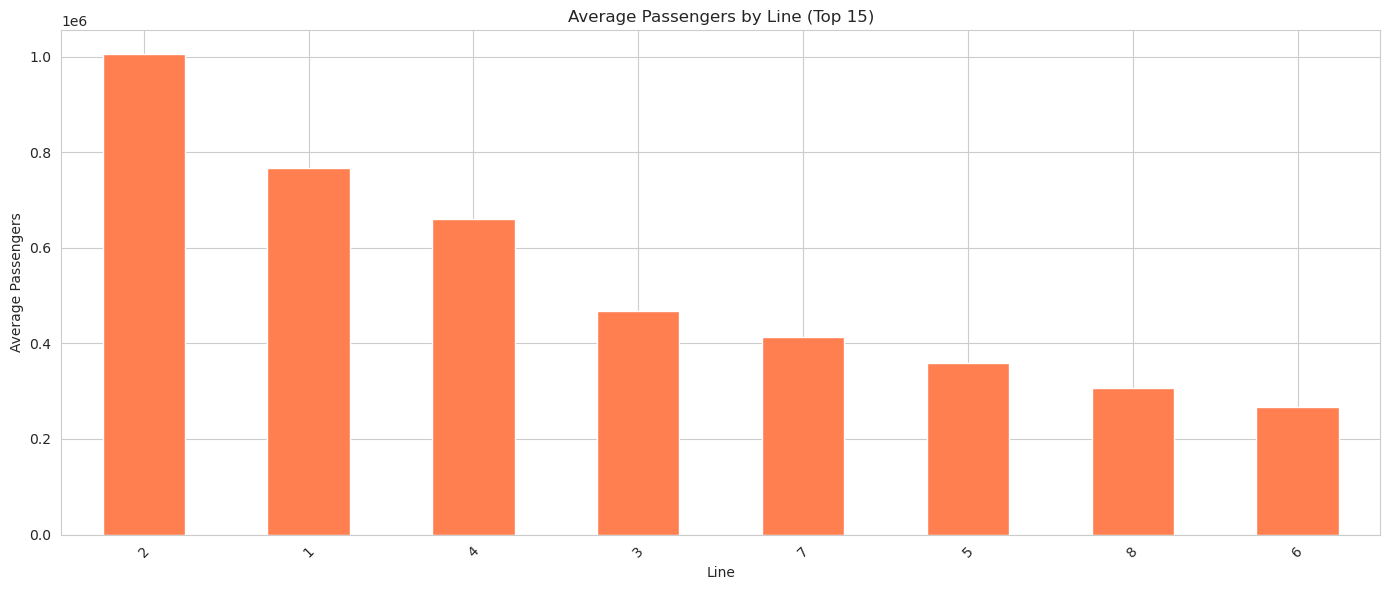

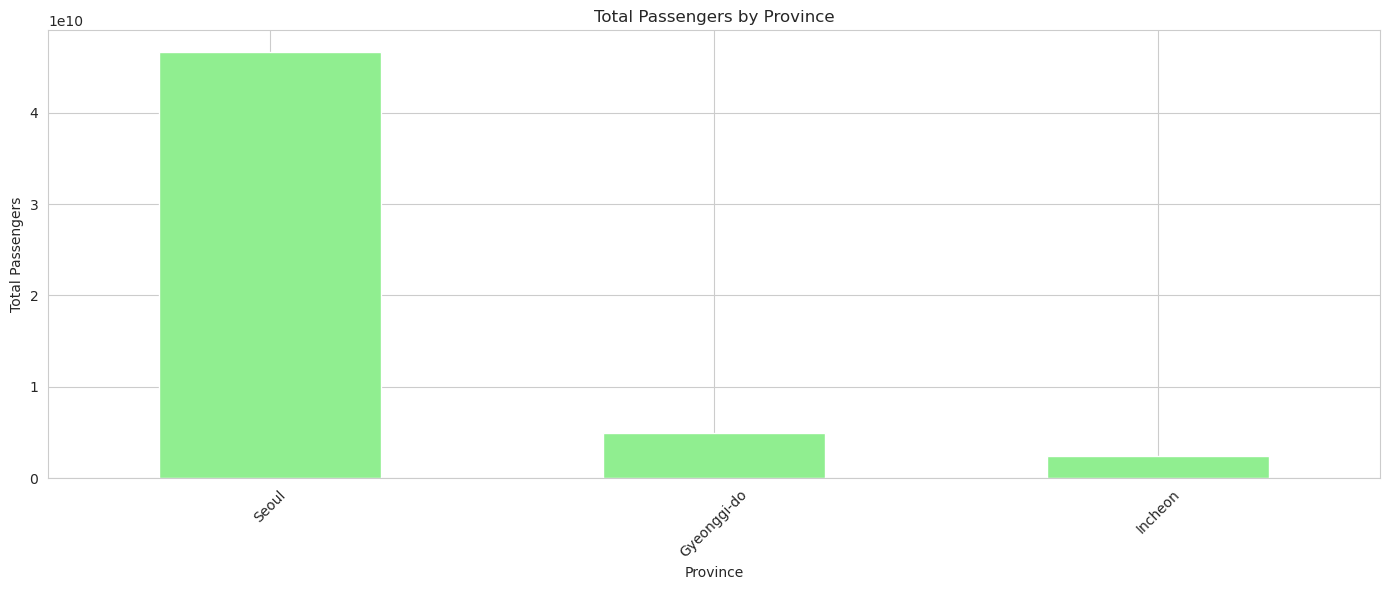

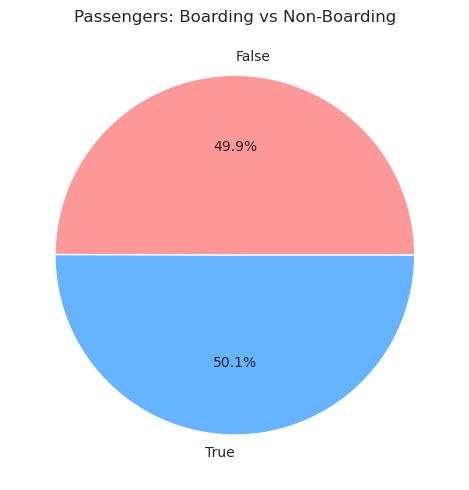

In [9]:
# Passengers vs Year
fig, ax = plt.subplots(figsize=(14, 5))
yearly_data = df.groupby('Year')['Passengers'].agg(['mean', 'sum'])
ax_1 = ax
ax_1.plot(yearly_data.index, yearly_data['sum'], marker='o', linewidth=2, label='Total Passengers', color='steelblue')
ax_1.set_xlabel('Year')
ax_1.set_ylabel('Total Passengers', color='steelblue')
ax_1.tick_params(axis='y', labelcolor='steelblue')
ax_1.set_title('Total Passengers by Year')
ax_1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Passengers by Line
fig, ax = plt.subplots(figsize=(14, 6))
line_data = df.groupby('Line')['Passengers'].mean().sort_values(ascending=False).head(15)
line_data.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Average Passengers by Line (Top 15)')
ax.set_xlabel('Line')
ax.set_ylabel('Average Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Passengers by Province
fig, ax = plt.subplots(figsize=(14, 6))
province_data = df.groupby('Province')['Passengers'].sum().sort_values(ascending=False)
province_data.plot(kind='bar', ax=ax, color='lightgreen')
ax.set_title('Total Passengers by Province')
ax.set_xlabel('Province')
ax.set_ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boarding vs Non-Boarding
fig, ax = plt.subplots(figsize=(10, 5))
boarding_data = df.groupby('Boarding')['Passengers'].sum()
boarding_data.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
ax.set_title('Passengers: Boarding vs Non-Boarding')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

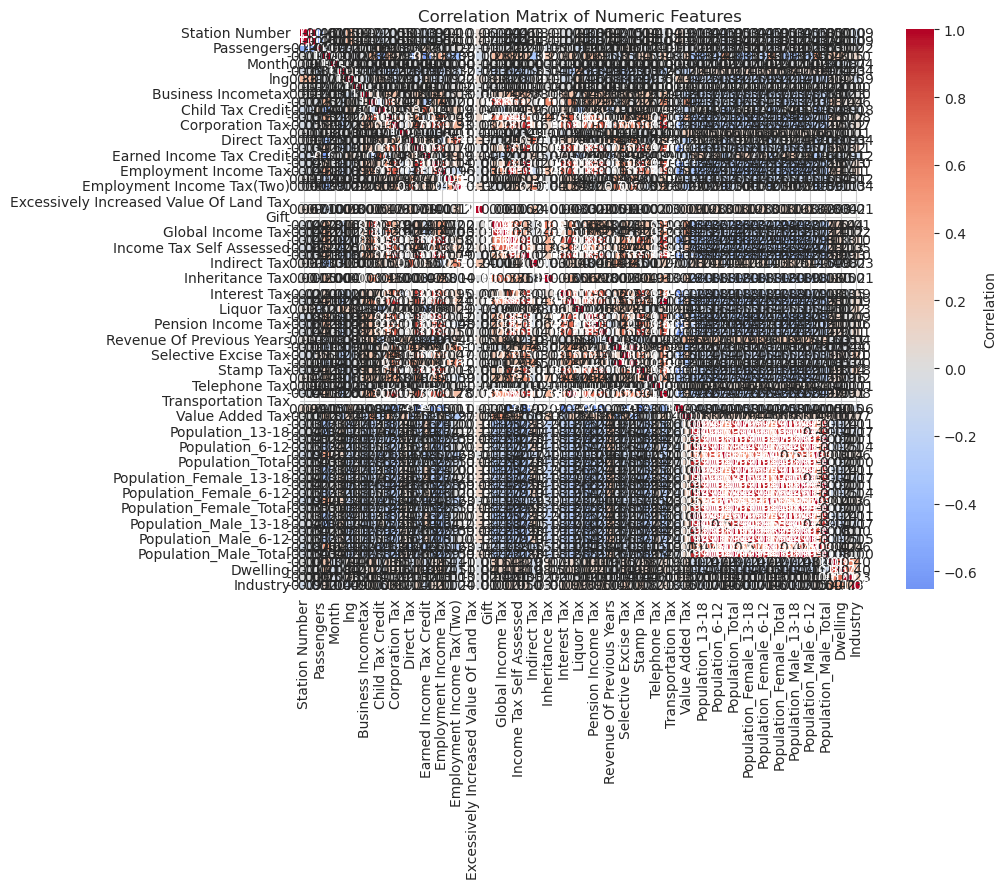


Strong Correlations (|r| > 0.5):
Station Number <-> Line: 0.998
Year <-> Earned Income Tax Credit: -0.597
Capital Gains Tax <-> Comprehensive Real Estate Holding Tax: 0.796
Capital Gains Tax <-> Gift Tax: 0.881
Capital Gains Tax <-> Global Income Tax: 0.861
Capital Gains Tax <-> Income Tax: 0.587
Capital Gains Tax <-> Income Tax Self Assessed: 0.686
Capital Gains Tax <-> Inheritance Tax: 0.557
Capital Gains Tax <-> Internal Tax: 0.528
Capital Gains Tax <-> Total_Tax: 0.500
Child Tax Credit <-> Earned Income Tax Credit: 0.779
Comprehensive Real Estate Holding Tax <-> Corporation Tax: 0.606
Comprehensive Real Estate Holding Tax <-> Dividend Income Tax: 0.556
Comprehensive Real Estate Holding Tax <-> Education Tax: 0.517
Comprehensive Real Estate Holding Tax <-> Employment Income Tax: 0.724
Comprehensive Real Estate Holding Tax <-> Gift Tax: 0.756
Comprehensive Real Estate Holding Tax <-> Global Income Tax: 0.741
Comprehensive Real Estate Holding Tax <-> Income Tax: 0.845
Comprehensive R

In [10]:
# Create correlation matrix for numeric columns
correlation_matrix = df[numeric_cols].corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Print strong correlations (excluding self-correlation)
print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

## 7. Distribution Analysis

Distribution Analysis:

Station Number:
  Skewness: -0.106 (Fairly Symmetric)
  Kurtosis: -1.259

Line:
  Skewness: -0.108 (Fairly Symmetric)
  Kurtosis: -1.172

Passengers:
  Skewness: 2.235 (Highly Skewed)
  Kurtosis: 6.683

Year:
  Skewness: -0.018 (Fairly Symmetric)
  Kurtosis: -1.198

Month:
  Skewness: -0.001 (Fairly Symmetric)
  Kurtosis: -1.217

lat:
  Skewness: 0.368 (Fairly Symmetric)
  Kurtosis: -0.268

lng:
  Skewness: -0.610 (Moderately Skewed)
  Kurtosis: 0.324

Asset Revaluation Tax:
  Skewness: 65.447 (Highly Skewed)
  Kurtosis: 4292.694

Business Incometax:
  Skewness: 5.135 (Highly Skewed)
  Kurtosis: 27.928

Capital Gains Tax:
  Skewness: 2.656 (Highly Skewed)
  Kurtosis: 10.181

Child Tax Credit:
  Skewness: -1.978 (Highly Skewed)
  Kurtosis: 4.718

Comprehensive Real Estate Holding Tax:
  Skewness: 2.453 (Highly Skewed)
  Kurtosis: 6.751

Corporation Tax:
  Skewness: 2.944 (Highly Skewed)
  Kurtosis: 8.901

Defense Tax:
  Skewness: -21.819 (Highly Skewed)
  Kurtosi

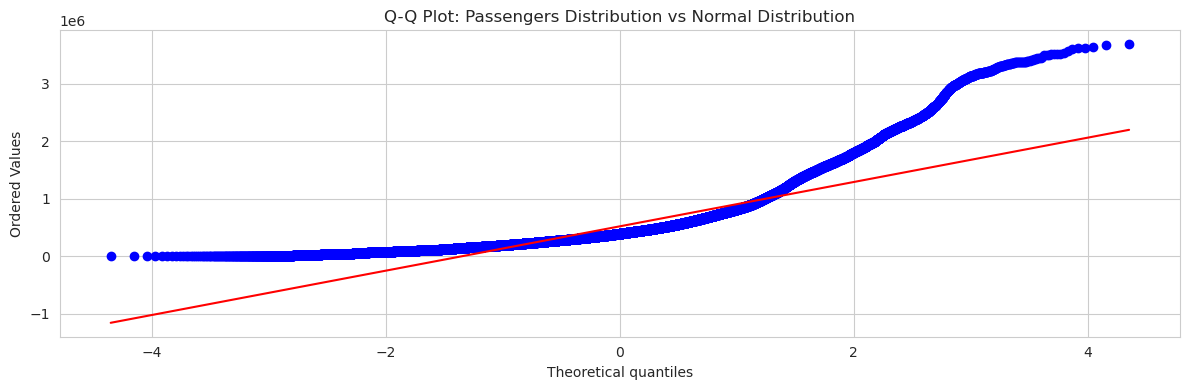



Year Distribution:
Year
2008    5894
2009    5904
2010    5976
2011    5976
2012    6018
2013    6144
2014    6144
2015    6144
2016    6144
2017    6144
2018    6180
2019    6220
2020    6264
2021    6264
2022    6104
2023    6132
2024    6060
Name: count, dtype: int64


In [11]:
# Analyze skewness and kurtosis
from scipy import stats

print("Distribution Analysis:")
print("="*60)
for col in numeric_cols:
    skewness = stats.skew(df[col].dropna())
    kurtosis = stats.kurtosis(df[col].dropna())
    print(f"\n{col}:")
    print(f"  Skewness: {skewness:.3f}", end="")
    if abs(skewness) > 1:
        print(" (Highly Skewed)")
    elif abs(skewness) > 0.5:
        print(" (Moderately Skewed)")
    else:
        print(" (Fairly Symmetric)")
    print(f"  Kurtosis: {kurtosis:.3f}")

# Distribution of passengers - QQ plot
fig, ax = plt.subplots(figsize=(12, 4))
stats.probplot(df['Passengers'].dropna(), dist="norm", plot=ax)
ax.set_title('Q-Q Plot: Passengers Distribution vs Normal Distribution')
plt.tight_layout()
plt.show()

# Distribution of Year
print("\n\nYear Distribution:")
print(df['Year'].value_counts().sort_index())

## 8. Trend Analysis

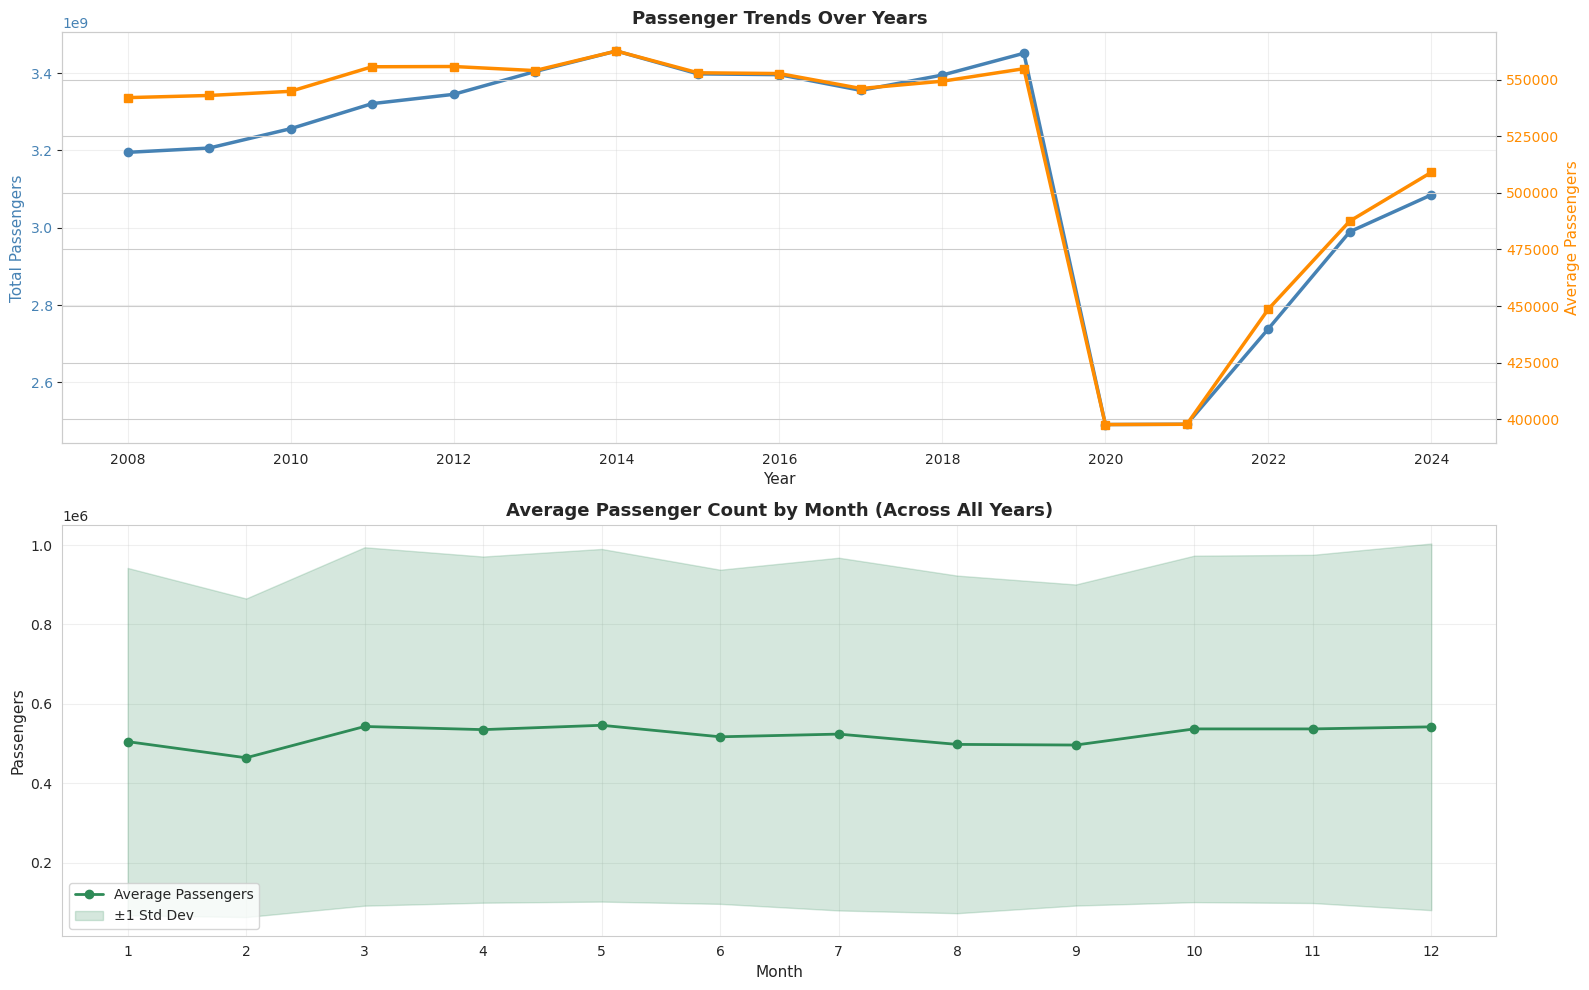

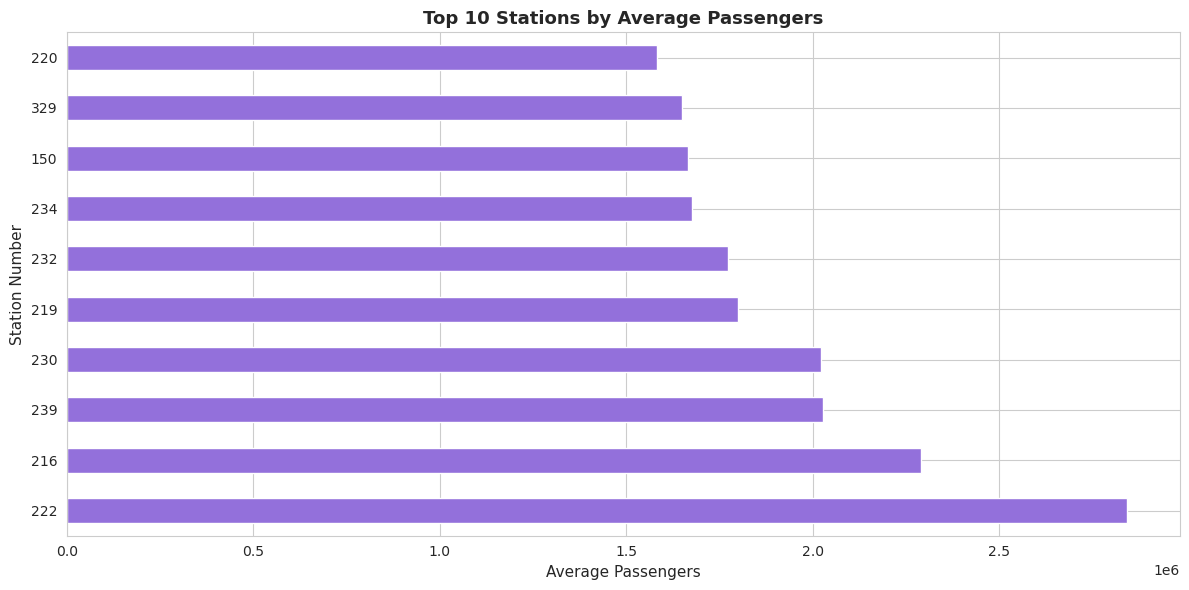

In [12]:
# Passengers trend by year and month
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Year-over-year trend
yearly_trend = df.groupby('Year')['Passengers'].agg(['mean', 'sum', 'count'])
ax1 = axes[0]
ax1_twin = ax1.twinx()
ax1.plot(yearly_trend.index, yearly_trend['sum'], marker='o', linewidth=2.5, 
         label='Total Passengers', color='steelblue', markersize=6)
ax1_twin.plot(yearly_trend.index, yearly_trend['mean'], marker='s', linewidth=2.5, 
              label='Average Passengers', color='darkorange', markersize=6)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Total Passengers', color='steelblue', fontsize=11)
ax1_twin.set_ylabel('Average Passengers', color='darkorange', fontsize=11)
ax1.set_title('Passenger Trends Over Years', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1_twin.tick_params(axis='y', labelcolor='darkorange')

# Monthly trend
monthly_trend = df.groupby('Month')['Passengers'].agg(['mean', 'std'])
ax2 = axes[1]
ax2.plot(monthly_trend.index, monthly_trend['mean'], marker='o', linewidth=2, 
         label='Average Passengers', color='seagreen', markersize=6)
ax2.fill_between(monthly_trend.index, 
                 monthly_trend['mean'] - monthly_trend['std'],
                 monthly_trend['mean'] + monthly_trend['std'],
                 alpha=0.2, color='seagreen', label='±1 Std Dev')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Passengers', fontsize=11)
ax2.set_title('Average Passenger Count by Month (Across All Years)', fontsize=13, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Top 10 stations by average passengers
top_stations = df.groupby('Station Number')['Passengers'].mean().nlargest(10)
fig, ax = plt.subplots(figsize=(12, 6))
top_stations.plot(kind='barh', ax=ax, color='mediumpurple')
ax.set_xlabel('Average Passengers', fontsize=11)
ax.set_ylabel('Station Number', fontsize=11)
ax.set_title('Top 10 Stations by Average Passengers', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Geographic Analysis

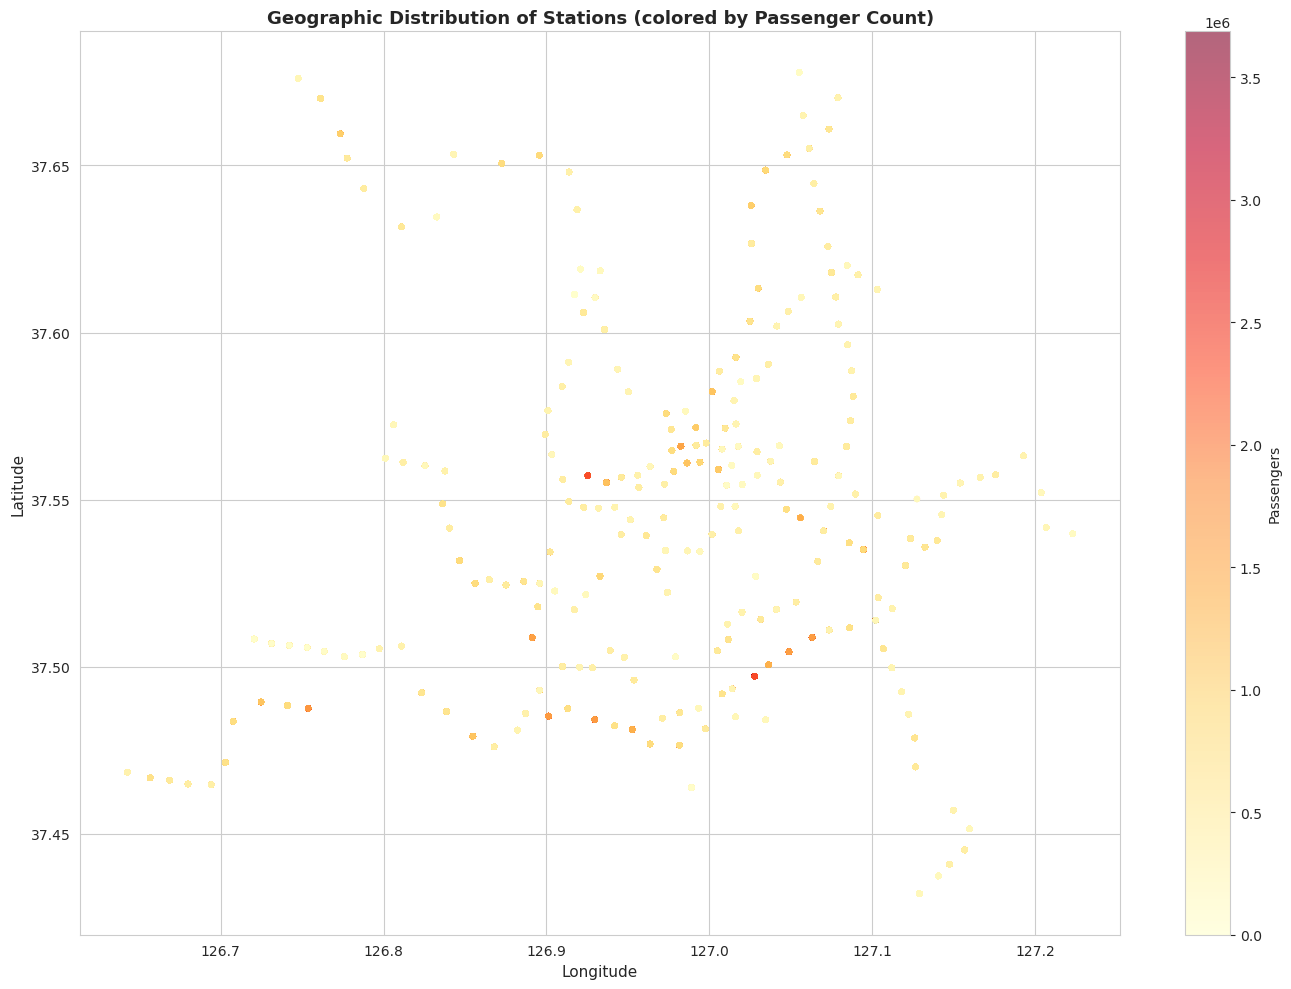

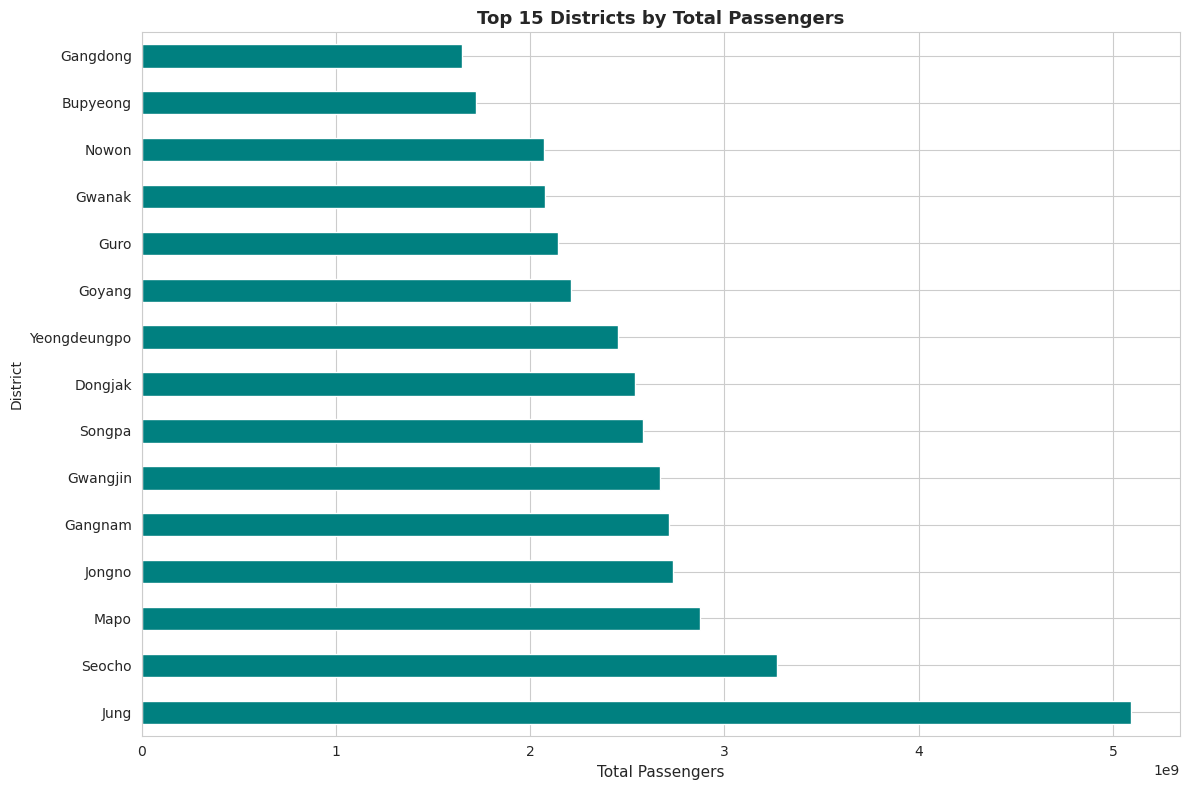

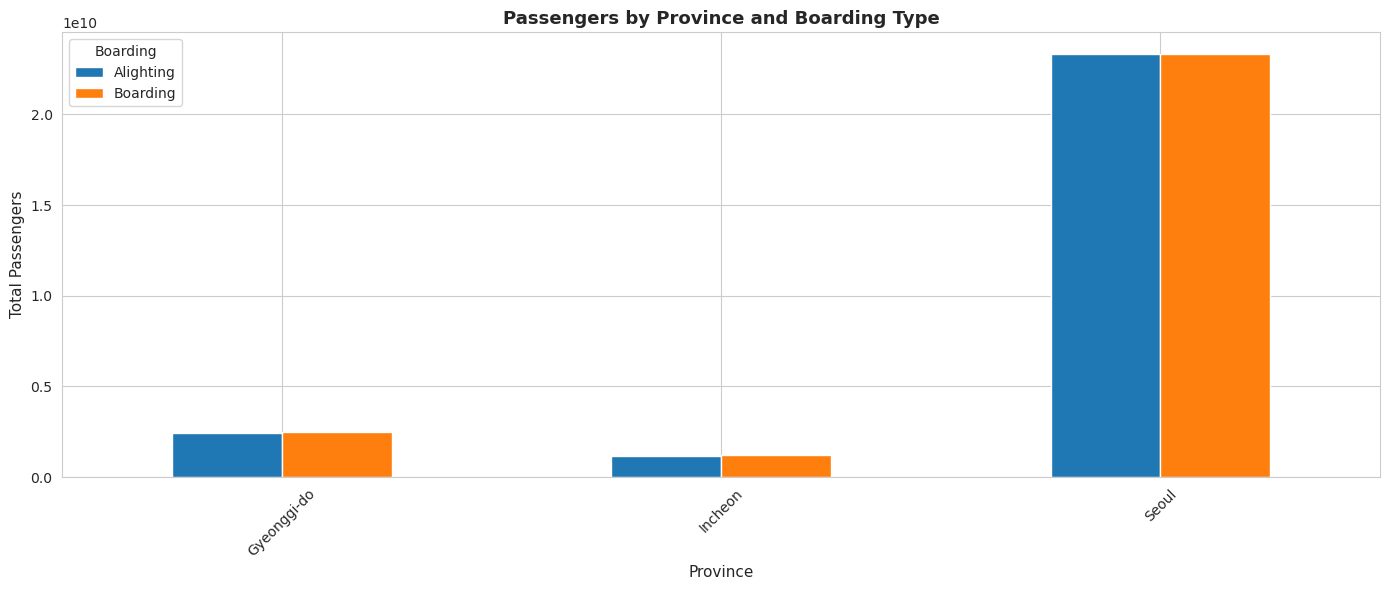

In [ ]:
# Geographic distribution of stations on Seoul/South Korea map (colored by Passenger Count)
if 'lat' in df.columns and 'lng' in df.columns and 'Passengers' in df.columns:
    # Create a map centered on Seoul
    seoul_center = [37.5665, 126.9780]
    m = folium.Map(location=seoul_center, zoom_start=11, tiles='OpenStreetMap')
    
    # Normalize passenger counts for color intensity
    passengers_min = df['Passengers'].min()
    passengers_max = df['Passengers'].max()
    df_normalized = df.copy()
    df_normalized['passengers_norm'] = (df['Passengers'] - passengers_min) / (passengers_max - passengers_min)
    
    # Sample data to avoid too many markers (take every 100th row for performance)
    df_sample = df_normalized.iloc[::100]
    
    # Add stations as markers with color based on passenger count
    for idx, row in df_sample.iterrows():
        # Color gradient from blue (low) to red (high)
        color_intensity = row['passengers_norm']
        if color_intensity < 0.33:
            color = 'blue'
        elif color_intensity < 0.66:
            color = 'orange'
        else:
            color = 'red'
        
        folium.CircleMarker(
            location=[row['lat'], row['lng']],
            radius=6,
            popup=f"Passengers: {row['Passengers']:,.0f}",
            color=color,
            fill=True,
            fillColor=color,
            fillOpacity=0.7,
            weight=1
        ).add_to(m)
    
    display(m)
    print("Interactive map displayed above (sampled data for performance)")

# Top districts by total passengers
top_districts = df.groupby('District')['Passengers'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(12, 8))
top_districts.plot(kind='barh', ax=ax, color='teal')
ax.set_xlabel('Total Passengers', fontsize=11)
ax.set_title('Top 15 Districts by Total Passengers', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Line distribution across provinces
fig, ax = plt.subplots(figsize=(14, 6))
line_province = df.pivot_table(values='Passengers', index='Province', columns='Boarding', aggfunc='sum')
line_province.plot(kind='bar', ax=ax)
ax.set_title('Passengers by Province and Boarding Type', fontsize=13, fontweight='bold')
ax.set_xlabel('Province', fontsize=11)
ax.set_ylabel('Total Passengers', fontsize=11)
plt.xticks(rotation=45)
plt.legend(title='Boarding', labels=['Alighting', 'Boarding'])
plt.tight_layout()
plt.show()

## 10. Key Insights and Findings

In [14]:
print("="*80)
print("KEY INSIGHTS AND FINDINGS - FINAL DATASET EDA")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"   • Number of Unique Stations: {df['Station Number'].nunique()}")
print(f"   • Number of Unique Lines: {df['Line'].nunique()}")
print(f"   • Geographic Coverage: {df['Province'].nunique()} provinces, {df['District'].nunique()} districts")

print("\n2. PASSENGER STATISTICS:")
print(f"   • Total Passengers: {df['Passengers'].sum():,.0f}")
print(f"   • Average Passengers per Record: {df['Passengers'].mean():,.0f}")
print(f"   • Median Passengers per Record: {df['Passengers'].median():,.0f}")
print(f"   • Max Passengers (single record): {df['Passengers'].max():,.0f}")
print(f"   • Min Passengers (single record): {df['Passengers'].min():,.0f}")

print("\n3. PASSENGER COMPOSITION:")
boarding_pct = (df[df['Boarding'] == True]['Passengers'].sum() / df['Passengers'].sum()) * 100
print(f"   • Boarding Passengers: {boarding_pct:.1f}%")
print(f"   • Alighting Passengers: {100-boarding_pct:.1f}%")

print("\n4. TEMPORAL PATTERNS:")
yearly_total = df.groupby('Year')['Passengers'].sum()
yearly_avg = df.groupby('Year')['Passengers'].mean()
print(f"   • Peak Year: {yearly_total.idxmax()} with {yearly_total.max():,.0f} passengers")
print(f"   • Lowest Year: {yearly_total.idxmin()} with {yearly_total.min():,.0f} passengers")
print(f"   • Year-over-year Growth: {((yearly_total.iloc[-1] - yearly_total.iloc[0])/yearly_total.iloc[0]*100):.1f}%")

monthly_avg = df.groupby('Month')['Passengers'].mean()
print(f"   • Peak Month: Month {monthly_avg.idxmax()} with {monthly_avg.max():,.0f} avg passengers")
print(f"   • Lowest Month: Month {monthly_avg.idxmin()} with {monthly_avg.min():,.0f} avg passengers")

print("\n5. GEOGRAPHIC INSIGHTS:")
top_province = df.groupby('Province')['Passengers'].sum().idxmax()
print(f"   • Busiest Province: {top_province}")
top_district = df.groupby('District')['Passengers'].sum().idxmax()
print(f"   • Busiest District: {top_district}")
print(f"   • Provinces with Data: {', '.join(df['Province'].unique()[:5])}..." if df['Province'].nunique() > 5 else f"   • Provinces: {', '.join(df['Province'].unique())}")

print("\n6. LINE ANALYSIS:")
top_line = df.groupby('Line')['Passengers'].mean().idxmax()
print(f"   • Busiest Line (by avg): Line {top_line}")
print(f"   • Number of Lines: {df['Line'].nunique()}")

print("\n7. DATA QUALITY:")
print(f"   • Missing Values: {df.isnull().sum().sum()}")
print(f"   • Duplicate Records: {df.duplicated().sum()}")

print("\n" + "="*80)


KEY INSIGHTS AND FINDINGS - FINAL DATASET EDA

1. DATASET OVERVIEW:
   • Total Records: 103,712
   • Time Period: 2008 - 2024
   • Number of Unique Stations: 260
   • Number of Unique Lines: 8
   • Geographic Coverage: 3 provinces, 34 districts

2. PASSENGER STATISTICS:
   • Total Passengers: 53,973,015,177
   • Average Passengers per Record: 520,412
   • Median Passengers per Record: 392,764
   • Max Passengers (single record): 3,688,248
   • Min Passengers (single record): 0

3. PASSENGER COMPOSITION:
   • Boarding Passengers: 50.1%
   • Alighting Passengers: 49.9%

4. TEMPORAL PATTERNS:
   • Peak Year: 2014 with 3,456,895,758 passengers
   • Lowest Year: 2020 with 2,490,984,496 passengers
   • Year-over-year Growth: -3.4%
   • Peak Month: Month 5 with 546,094 avg passengers
   • Lowest Month: Month 2 with 464,243 avg passengers

5. GEOGRAPHIC INSIGHTS:
   • Busiest Province: Seoul
   • Busiest District: Jung
   • Provinces: Gyeonggi-do, Incheon, Seoul

6. LINE ANALYSIS:
   • Busiest